# GUILHERME DUARTE ARAÚJO DE OLIVEIRA RAIMUNDO, 58053

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

### DEADLINE: 13-October-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want.

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file

In [ ]:
!unzip /content/assignment2.zip

Archive:  /content/assignment2.zip
replace assignment2/children.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [14]:
# This code cell does not need to be changed
import os
import pandas as pd

dataFileName = os.path.join( "assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()

,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age.

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age.

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children?. In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20).


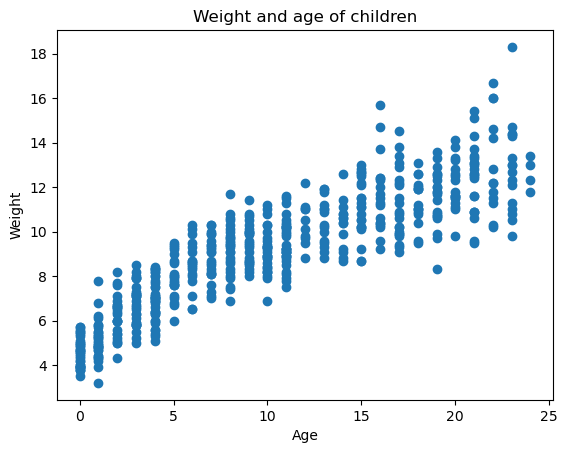

In [15]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on your solution.
import numpy as np
from sklearn import linear_model

x_feature = dataDF[['age']]
y_labels = dataDF[['weight']]

plt.scatter(x_feature, y_labels)
plt.title('Weight and age of children')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [16]:
dataDF.corr()

,age,weight
age,1.000000,0.879615
weight,0.879615,1.000000


**Answer:** In my opinion exists a correlation between the weight and the age of the children. Linear regressions defend a positive relationship between the input variable (Weight) and the target variable (Age). In this case, there is a positive correlation because it is possible to identify a pattern among the data points. The data points go upwards from left to right forming a line meaning that as one variable increases, the other tends to increase as well. The strength of the correlation seems high because the Pearson Correlation Index Value tend to be closer to 1 as you can you see in the correlation done above (0.88). I can't identify any specific outliers and it is possible to verify different clusters in the graph. In result, I consider that is reasonable to create a linear regression because the scatter plot of the data suggests a reasonably linear pattern between the age and the weight. However, it is worth noticing that correlation is different of causation and the correlation might be influenced by other factors such as independence of errors, and others.

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20)

In [17]:
# Solve question here.
seed = 10
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

training_dataset, testing_dataset = train_test_split(dataDF, test_size = 0.2, random_state=seed)
train_x = training_dataset[['age']]
train_y = training_dataset[['weight']]
test_x = testing_dataset[['age']]
test_y = testing_dataset[['weight']]
linear_model = linear_model.LinearRegression()
linear_model.fit(train_x, train_y)
true_error = cross_val_score(linear_model, x_feature, y_labels, scoring='neg_mean_squared_error', cv = 10).mean()

print(true_error)

-1.6362454439449432


### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20)

theta0 =  [5.70009106]
theta1 =  [[0.33934153]]
Linear Equation: Weight= [5.70009106] + [0.33934153] * Age


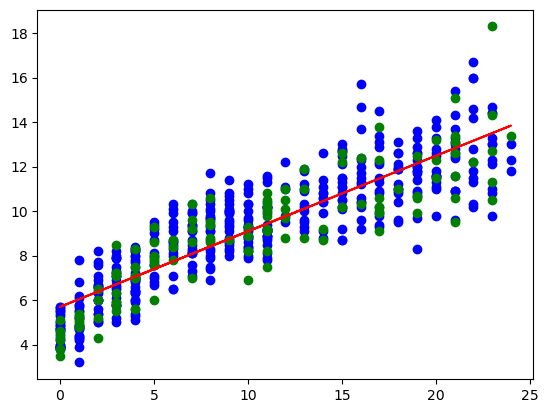

In [18]:
# Solve question here.
predictive_model = linear_model.predict(train_x)
plt.scatter(train_x, train_y, c = 'b')
plt.scatter(test_x, test_y, c = 'g')
plt.plot(train_x['age'],predictive_model, color = 'red')

print('theta0 = ',linear_model.intercept_)
print('theta1 = ', linear_model.coef_)
print('Linear Equation: Weight=', f'{linear_model.intercept_} + {linear_model.coef_[0]} * Age')
plt.show()

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (7 out of 20)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

seed = 10

def data_poly(degree, age):
    polynomialfeatures = PolynomialFeatures(degree)
    poly_data = polynomialfeatures.fit_transform(age)
    df_input = pd.DataFrame(poly_data)
    return df_input

polymodel = linear_model.LinearRegression()

poly_df = pd.DataFrame({'degree' : range(1, 11, 1)})

poly_df.rename(columns = {'degree':'Degree'}, inplace = True)

poly_df['True Error'] = poly_df['Degree'].apply(lambda d: cross_val_score(polymodel, data_poly(d, x_feature), y_labels, scoring='neg_mean_squared_error', cv = 10).mean())
poly_df.sort_values('True Error', ascending=False)

poly_df.reset_index(drop=True)


,Degree,True Error
0,1,-1.636245
1,2,-1.443860
2,3,-1.409529
3,4,-1.412721
4,5,-1.419276
5,6,-1.421643
6,7,-1.417251
7,8,-1.407285
8,9,-1.413354
9,10,-1.400800


In [33]:
def metrics(degree, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

    polynomial_features = PolynomialFeatures(degree)
    x_poly_train = polynomial_features.fit_transform(x_train)
    x_poly_test = polynomial_features.transform(x_test)

    model = linear_model.LinearRegression()
    model.fit(x_poly_train, y_train)
    y_poly_train_pred = model.predict(x_poly_train)
    y_poly_test_pred = model.predict(x_poly_test)

    mse_train = mean_squared_error(y_train, y_poly_train_pred)
    rmse_train = mean_squared_error(y_train, y_poly_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_poly_train_pred)
    r2_train = r2_score(y_train, y_poly_train_pred)

    mse_test = mean_squared_error(y_test, y_poly_test_pred)
    rmse_test = mean_squared_error(y_test, y_poly_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_poly_test_pred)
    r2_test = r2_score(y_test, y_poly_test_pred)

    return {
        "Train MSE": mse_train,
        "Train RMSE": rmse_train,
        "Train MAE": mae_train,
        "Train R^2": r2_train,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test,
        "Test R^2": r2_test
    }


In [34]:
from sklearn import linear_model
x = dataDF[['age']]
y = dataDF[['weight']]
degrees = list(range(1, 11))
mse_scores = []
rmse_scores = []
mae_scores = []
r2_scores = []

for degree in degrees:
    results = metrics(degree, x, y)
    mse_scores.append(results["Train MSE"])  # or "Test MSE" if you want test results
    rmse_scores.append(results["Train RMSE"])
    mae_scores.append(results["Train MAE"])
    r2_scores.append(results["Train R^2"])

print("MSE Scores:", mse_scores)
print("RMSE Scores:", rmse_scores)
print("MAE Scores:", mae_scores)
print("R^2 Scores:", r2_scores)

MSE Scores: [1.6145693599773567, 1.5560881239198017, 1.3579468819970544, 1.4408290761431137, 1.4790264387594805, 1.419441380794639, 1.3547271986530287, 1.3724496564554969, 1.3797616889056727, 1.3023081692500251]
RMSE Scores: [1.270657058366795, 1.2474326129774713, 1.165309779413635, 1.200345398684526, 1.2161523090301973, 1.191403114312968, 1.1639274885717876, 1.1715159650877562, 1.1746325761299456, 1.1411871753792298]
MAE Scores: [1.011024540548251, 0.9838566749606752, 0.9207673027098061, 0.9467331386464617, 0.9482750329004271, 0.929318081762167, 0.912354706392116, 0.9208610555016942, 0.9212773709786456, 0.9020914793982222]
R^2 Scores: [0.7698703851981116, 0.7793126733561755, 0.8135930737271493, 0.7971004533849924, 0.796225360197342, 0.8006673247295781, 0.8107742373505696, 0.8151145448102084, 0.8062046473849241, 0.8082470758423135]


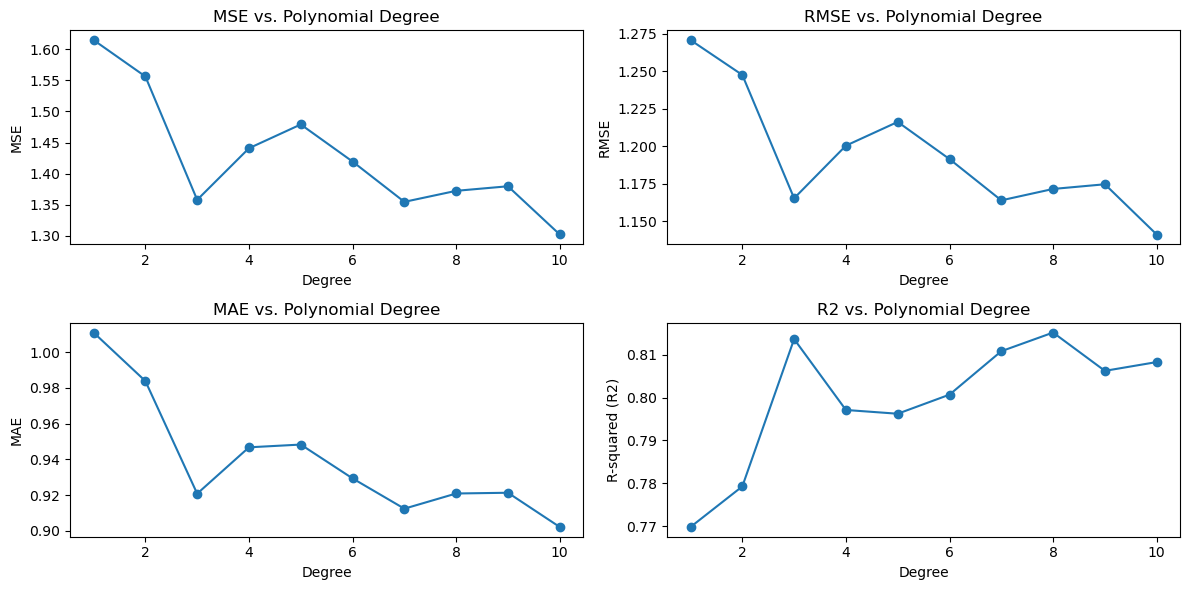

In [35]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE vs. Polynomial Degree')

plt.subplot(2, 2, 2)
plt.plot(degrees, rmse_scores, marker='o')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs. Polynomial Degree')

plt.subplot(2, 2, 3)
plt.plot(degrees, mae_scores, marker='o')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.title('MAE vs. Polynomial Degree')

plt.subplot(2, 2, 4)
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel('Degree')
plt.ylabel('R-squared (R2)')
plt.title('R2 vs. Polynomial Degree')

plt.tight_layout()
plt.show()

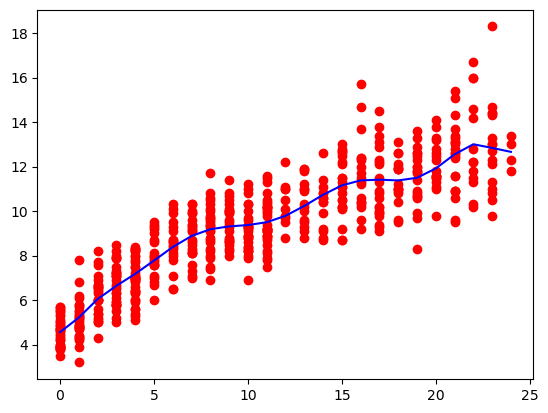

In [10]:
dataFileName = os.path.join( "assignment2", "children.csv")
polyDF = pd.read_csv(dataFileName)
polyDF = dataDF.sort_values('age')
polyDF.head()

x = polyDF[['age']]
y = polyDF[['weight']]

def poly_model(degree):
    polynomial_features = PolynomialFeatures(degree)

    x_poly = polynomial_features.fit_transform(x)

    model = linear_model.LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    plt.scatter(x, y, color='red')
    plt.plot(x['age'],y_poly_pred, color='blue')

poly_model(10)

**Answer:** The degree that I would you choose in order to have a better model when compared to the model built previously is 10. The explanation of my choice is on the 5 pieces of code below. By observing the plots of each degree, it is impossible to reach any conclusion on what degree to choose from the interval between 1 and 10. However, it can be understandable which degree is preferable by observing the true error for each degree. The first piece of code achieves that by putting the true error for each degree in a dataframe. The lowest true error indicates the best degree.

To achieve a more complete solution, it is necessary to calculate other error metrics for each degree. The first three pieces of code have methods and functions that create the model by splitting into training and testing datasets (80% of dataset is training and 20% is testing). Moreover, the code computes the metrics for training and testing and store it a list.

Then, I plotted the results to see how metrics (y-line in the plots) behave by degree (x-line in the plots). The train metrics are used because it represents the majority of the dataset. The ideal degree that can define a better model is given by the lowest mean squared error (MSE), lowest root mean squared error (RMSE) and the highest R-squared. 10 is the number with the best results.

Lastly, I plotted the actual polynomial model with degree 10 and results in a better model than the linear model previously built. It is possible to prove that by comparing mean squared error values. In question 1.b), the number is around 1.70 and in this model is around 1.35, so this model improved its results.

### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (3 points out of 20)

In [36]:
# Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
training_dataset, testing_dataset = train_test_split(dataDF, test_size = 0.2, random_state = seed)

train_x = training_dataset[['age']]
train_y = training_dataset[['weight']]
x_test = testing_dataset[['age']]
y_test = testing_dataset[['weight']]

poly_model = linear_model.LinearRegression()
poly_model.fit(data_poly(10, train_x), train_y)

print('theta0 (Intercept) = ',poly_model.intercept_)
print('theta1 (Coefficients) = ',poly_model.coef_)

theta0 (Intercept) =  [4.62818051]
theta1 (Coefficients) =  [[ 0.00000000e+00 -3.52571583e-01  1.69330741e+00 -9.85923495e-01
   2.85290739e-01 -4.70385425e-02  4.67694701e-03 -2.85184163e-04
   1.04255965e-05 -2.09619912e-07  1.78149868e-09]]


**Note**: I printed the coefficients and the intercept but the coefficients of the best curve are represented only by the variable "Coefficients". The Intercept represents the value of the dependent variable when all the independent variables are zero. In this case the independent variable is age